<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Brain Observatory - Visual Behavior </h1> 
<h2 align="center">Summer Workshop on the Dynamic Brain </h2> 
<h3 align="center">Monday, August 23, 2021</h3> 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Visual Behavior Exercises Overview </h2>
    
<p> This notebook contains exercises covering several topics including behavior performance, single cell physiology and across session analysis.
  
<p> The exercises can be done in sequential order, or you can skip around to the exercises that interest you most. 
    
<p> If you get stuck, please ask a TA for help, look it up on stackoverflow, or check the solutions notebook. 
    We dont expect you to know everything already - the goal is to learn, and learning requires making mistakes and asking questions. 

<h3>Outline </h3>

<p><b>Behavior Exercises</b>
<ul><li>Exercise 1.1: Plot the distribution of reaction times for go trials from one session
    <li>Exercise 1.2: Plot reward rate over time during a session
<li>Exercise 1.3: Compute and plot hit rate over time during a session
<li>Exercise 1.4: Plot the average hit rate for each image
<li>Exercise 1.5: Plot the response probability for all image transitions
</ul>
<p><b>Single Cell Physiology Exercises</b> - this section requires response_analysis to be in utilities
<ul><li>Exercise 2.1: Plot activity across stimulus repetitions using the flash response dataframe
<li>Exercise 2.2: Correlate neural activity with running speed on a flash by flash basis
<li>Exercise 2.3: Plot the trial averaged response across images for one cell using the trial response dataframe
<li>Exercise 2.4: Create a heatmap of all cells' trial averaged responses following an image change
<li>Exercise 2.5: Compute a sparseness metric for one cell
<li>Exercise 2.6: Identify image responsive cells and the mean lifetime sparseness across the population
</ul>
<p><b>Across Session Physiology Exercises</b>
<ul><li>Exercise 3.1: Follow along to learn some useful pandas tricks for multi session data comparison
<li>Exercise 3.2: Compare the activity of matched cells across sessions
<li>Exercise 3.3: Merge all the experiments from a single container and plot the mean response for different image sets
<li>Exercise 3.4: Plot the trial averaged response for passive vs. active sessions from one container
</ul>
</div>

In [1]:
# you will need these libraries for computation & data manipulation
import os
import numpy as np
import pandas as pd

# matplotlib is a standard python visualization package
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is another library for statistical data visualization
# seaborn style & context settings make plots pretty & legible automatically
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})
sns.set_style('white');
sns.set_palette('deep');

In [2]:
# Import allensdk modules for loading and interacting with the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache
# Import allensdk utilities for Visual Behavior
#import allensdk.brain_observatory.behavior.swdb.utilities as tools

In [3]:
# This cell will find the appropriate path to the data based on your platform.
# You may need to edit the strings in this cell based on your configuration.

import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # macOS
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of the hard drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then linux (default here is for Ubuntu - insert your username; your distribution may differ)
    data_root = "/media/$USERNAME/Brain2019"
    
cache_path = os.path.join(data_root, 'dynamic-brain-workshop/visual_behavior/2021')

In [4]:
data_storage_directory = "/temp" # Note: this path must exist on your local drive
#cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)
cache = VisualBehaviorOphysProjectCache.from_lims()

In [5]:
%load_ext autoreload
%autoreload 2

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Pick an experiment session based on its <code>cre_line</code>, <code>imaging_depth</code>, <code>session_number</code> and with no <code>prior_exposure_to_session_type</code></b> (aka not a retake of a session)
    
<p>1) Filter the experiments table according to your metadata of interest and get the <code>ophys_experiment_id</code> for a session of your choosing. 
    
<p>Hint: use pandas Boolean indexing to filter by multiple column values.
    
 __[Documentation for Boolean indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)__


In [6]:
experiments = cache.get_ophys_experiment_table()

In [7]:
experiments.head()

,equipment_name,donor_id,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,foraging_id,session_type,...,ophys_container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,isi_experiment_id,imaging_depth,targeted_structure,published_at,date_of_acquisition
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
958527471,MESO.1,850862423,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,0210d6f7-93f7-4bc1-a622-5c22b1daa11c,OPHYS_3_images_A,...,1018028345,VisualBehaviorMultiscope,published,passed,20190924_457841_3imagesA,858992726,225,VISp,2021-03-25,2019-09-24 16:00:00
958527477,MESO.1,850862423,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,0210d6f7-93f7-4bc1-a622-5c22b1daa11c,OPHYS_3_images_A,...,1018028348,VisualBehaviorMultiscope,failed,failed,20190924_457841_3imagesA,858992726,300,VISp,NaT,2019-09-24 16:00:00
958527474,MESO.1,850862423,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,0210d6f7-93f7-4bc1-a622-5c22b1daa11c,OPHYS_3_images_A,...,1018028339,VisualBehaviorMultiscope,published,passed,20190924_457841_3imagesA,858992726,75,VISp,2021-03-25,2019-09-24 16:00:00
958527485,MESO.1,850862423,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,0210d6f7-93f7-4bc1-a622-5c22b1daa11c,OPHYS_3_images_A,...,1018028351,VisualBehaviorMultiscope,published,passed,20190924_457841_3imagesA,858992726,75,VISl,2021-03-25,2019-09-24 16:00:00
958527479,MESO.1,850862423,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,0210d6f7-93f7-4bc1-a622-5c22b1daa11c,OPHYS_3_images_A,...,1018028354,VisualBehaviorMultiscope,published,passed,20190924_457841_3imagesA,858992726,150,VISl,2021-03-25,2019-09-24 16:00:00


In [8]:
selected_experiments = experiments[(experiments.cre_line == 'Vip-IRES-Cre') &
                                   (experiments.imaging_depth == 175) & 
                                   (experiments.session_number == 4) &
                                   (experiments.prior_exposures_to_session_type == 0)]
selected_experiments.head()

,equipment_name,donor_id,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,foraging_id,session_type,...,ophys_container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,isi_experiment_id,imaging_depth,targeted_structure,published_at,date_of_acquisition
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
795953296,CAM2P.4,744911447,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,152.0,7b725c5e-e68b-4bf5-a6d2-2a9879ca729b,OPHYS_4_images_B,...,791352433,VisualBehavior,published,passed,20181214_412036_4imagesB,754116317,175,VISp,2021-03-25,2018-12-14 20:17:05.000000
830093338,CAM2P.4,791756316,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,429952,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,138.0,45b8639c-e529-41ec-8963-c78fac2dc6c5,OPHYS_4_images_B,...,825183217,VisualBehavior,published,passed,20190227_429952_4imagesB,802841369,175,VISp,2021-03-25,2019-02-27 16:09:43.000000
935426822,CAM2P.3,879064131,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467951,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,135.0,db87c2a1-ea6d-4356-b044-6decb73be2d4,OPHYS_4_images_A,...,928325203,VisualBehaviorTask1B,published,failed,20190829_467951_4imagesA,888237949,175,VISp,2021-03-25,2019-08-29 17:37:55.000000
1010556655,MESO.1,990779712,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,499478,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,142.0,d4e7b1c5-969e-45b8-a8df-fb5646b29ab8,OPHYS_4_images_H,...,1018027809,VisualBehaviorMultiscope4areasx2d,published,passed,20200226_499478_4imagesH,994736136,175,VISal,2021-08-12,2020-02-26 08:55:03.479109
968651977,CAM2P.4,880255009,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467953,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,183.0,9a74ba11-c701-48cc-a7fb-b179cec788b5,OPHYS_4_images_A,...,957570596,VisualBehaviorTask1B,published,passed,20191016_467953_4imagesA,888943558,175,VISp,2021-03-25,2019-10-16 15:28:20.000000


In [9]:
experiment_id = selected_experiments.index.values[0]

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Load the experiment object for your experiment

</div>

In [10]:
ophys_experiment = cache.get_behavior_ophys_experiment(experiment_id)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Behavior Exercises</h2>

<p> This set of exercises explores basic behavior metrics, using the 'trials' dataframe. The 'trials' dataframe is organized around the times of stimulus identity changes (go trials) and sham change times (catch trials). It contains data and metadata for each trial, including lick times, reward times, and image identity.
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.1: Plot the distribution of reaction times for go trials from one session</b>

<p> 1) get the <code>trials</code> dataframe from the session object. 
    
<p> 2) Filter the trials dataframe to get go trials only. 
    
<p> 3) Use the values of the <code>response_latency</code> column to plot a histogram of reaction times. 
    
<p> <code>response_latency</code> is the first lick time, in seconds, relative to the change time. 
    
</div>

In [11]:
# copy trials df
trials_df = ophys_experiment.trials.copy()
# display columns of trials df
trials_df.tail()

C:\Users\iryna.yavorska\AppData\Roaming\Python\Python37\site-packages\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'behavior_monitoring', 'eye_tracking'}. Consider updating the sync file line labels.
  self._check_line_labels()


,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,...,correct_reject,start_time,stop_time,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
687,[],NaN,0.0,False,False,True,True,False,True,False,...,False,3866.36363,3874.37003,8.00640,NaN,231597.0,3870.137861,inf,im054,im045
688,[],NaN,0.0,False,False,True,True,False,True,False,...,False,3874.62042,3881.87591,7.25549,NaN,232047.0,3877.643651,inf,im045,im031
689,[],NaN,0.0,False,False,True,True,False,True,False,...,False,3882.12612,3890.88339,8.75727,NaN,232587.0,3886.650991,inf,im031,im035
690,[],NaN,0.0,False,False,False,False,False,False,True,...,True,3891.13345,3899.13998,8.00653,NaN,233082.0,3894.907701,inf,im035,im035
691,[],NaN,0.0,False,False,True,True,False,True,False,...,False,3899.39020,3911.90046,12.51026,NaN,233847.0,3907.668131,inf,im035,im106


In [12]:
trials_df.keys()

Index(['lick_times', 'reward_time', 'reward_volume', 'hit', 'false_alarm',
       'miss', 'stimulus_change', 'aborted', 'go', 'catch', 'auto_rewarded',
       'correct_reject', 'start_time', 'stop_time', 'trial_length',
       'response_time', 'change_frame', 'change_time', 'response_latency',
       'initial_image_name', 'change_image_name'],
      dtype='object')

`trials_df` contains many columns:
* `lick_times` -  if the animal licked during a trial, timestamps of licks in seconds
* `reward_time` - if the animal was rewarded during a trial, timestamps of reward in seconds
* `reward_volumn` - volume of water disposed if rewarded, in ml
* `hit` - if it was a hit trial, meaning a go trial that animal got correctly
* `false_alarm` - if it was a false alarm trial, meaning a no-go trial when animal licked
* `miss` - if it was a miss trial, a go trial but animal did not lick
* `stimulus_change` if the stimulus changed on this trial
* `aborted` - if the animal licked too quickly when the trials started, the trial was aborted
* `go` - if it was a go trials, True or False
* `catch` - if it was a catch trial, True or False (catch trial is a trial that would have been a go, but the image did not change
* `auto_rewarded` - if the trial was autorewarded; the first 5 go trials in the session are autorewarded to prime the animals for the task
* `correct_reject` - if the trial was a catch trial and the animal did not lick
* `start_time`
* `stop_time`
* `trial_length`
* `response_time`
* `change_frame`
* `change_time`
* `response_latency`
* `initial_image_name`
* `change_image_name`


In [13]:
# display values in response latency column for go trials
trials_df[trials_df['go']==True].response_latency

trials_id
3           inf
5      0.779499
6           inf
8      0.612649
10     1.029649
         ...   
685         inf
687         inf
688         inf
689         inf
691         inf
Name: response_latency, Length: 214, dtype: float64

***Note***:
`go` trials during which the animals did not respond have `inf` as a reponse latency value. This can be an inssue for plotting, because many functions expect finate values. We can replace `inf` with `NaN`.

In [14]:
# replace 'inf' with 'NaN'
trials_df['response_latency'].replace(to_replace=np.inf, value=np.nan, inplace=True)

In [15]:
trials_df[trials_df['go']==True]['response_latency']

trials_id
3           NaN
5      0.779499
6           NaN
8      0.612649
10     1.029649
         ...   
685         NaN
687         NaN
688         NaN
689         NaN
691         NaN
Name: response_latency, Length: 214, dtype: float64

C:\Users\iryna.yavorska\Anaconda3\envs\neuromatch\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\iryna.yavorska\Anaconda3\envs\neuromatch\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'time after change (sec)')

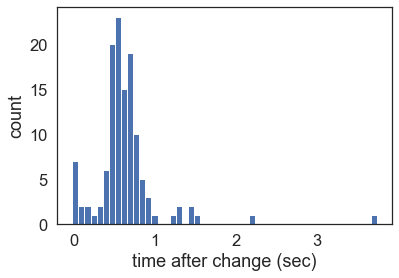

In [16]:
# plot histogram of response latencies
plt.hist(trials_df[trials_df['go']==True].response_latency.values, bins=50);
plt.ylabel('count')
plt.xlabel('time after change (sec)')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.2: Plot reward volumn over time during a session</b>

<p> 1) Use <code>calculate_reward_rate</code> in AllenSDK's <code>trial_processing</code> module to create a column <code>reward_rate</code> and <code>change_time</code> columns of the trials dataframe to plot reward rate over time. 
   
<p> Was the mouse actively performing the task and earning rewards during the entire session? 
    
</div>

In [17]:
from allensdk.brain_observatory.behavior.trials_processing import calculate_reward_rate

In [24]:
trials_df['reward_rate'] = calculate_reward_rate(trials_df['response_latency'].values, 
                                              trials_df['start_time'], window = 1.5)

In [26]:
# remove trials that were aborted due to animal's premature licking
trials_df_sel = trials_df[trials_df['aborted']==False]

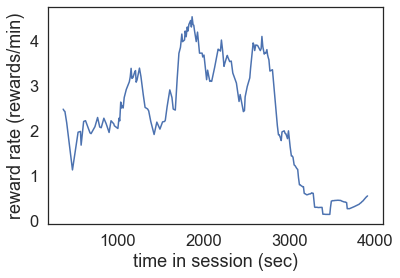

In [27]:
plt.plot(trials_df_sel['change_time'], trials_df_sel['reward_rate'])
plt.xlabel('time in session (sec)');
plt.ylabel('reward rate (rewards/min)');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.3: Compute and plot hit rate over time during a session</b>

<p> 1) Filter the trials dataframe to get the <code>hit</code> column for <code>go</code> trials only. Assign this to a new variable called <code>go_responses</code> for further computation. Note: Make sure that you get <code>go_responses</code> as a pandas series, without calling <code>.values</code>, so that the next step will work properly. 
    
<p> The <code>hit</code> column of the trials dataframe contains <i>True</i> for all trials where there was a licking response within the 750ms reward window and <i>False</i> where there was not. 

<p> 2) Apply the pandas <code>rolling()</code> method to <code>go_responses</code> followed by <code>.mean()</code> to take a rolling mean across go trials. Set <code>window = 25, center = True</code> in the call to <code>rolling()</code> for a centered window over 25 trials. Set the output of this step to a variable called <code>rolling_hit_rate</code>. 

 __[Documentation for pandas.rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)__
       
</div>

In [28]:
# total number of hits (True) and misses (False) in the go trials
trials_df[trials_df['go']==True].hit.value_counts()

False    119
True      95
Name: hit, dtype: int64

In [29]:
go_responses = trials_df[trials_df['go']==True].hit
rolling_hit_rate = go_responses.rolling(window=25, center=True).mean()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<p> 3) Plot the <code>rolling_hit_rate</code>. Label your axes.
       
</div>

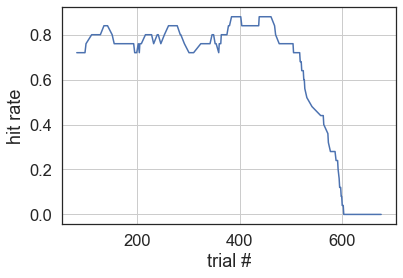

In [30]:
plt.plot(rolling_hit_rate)
plt.xlabel('trial #')
plt.ylabel('hit rate');
plt.grid()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.4: Plot the average hit rate for each image</b>

<p>1) Loop through the 8 images in this session and quantify the fraction of go trials where there was a correct response for each image to get the mean hit rate across the session. 
    Hint: Use <code>ophys_experiment.trials.change_image_name.unique()</code> to get the image names.

<p>2) Plot the average hit rate for each image, with image names along the x-axis. 
    
<p> Bonus: Sort hit rate values in ascending order and apply the same sorting to the image names along the x-axis. Hint: Useful functions include np.sort() and np.argsort()
    
</div>

In [31]:
# get the hit rate for each image
hit_rates = []
images = trials_df['change_image_name'].unique()
for image in images:
    image_change_trials = trials_df[(trials_df['change_image_name'] == image) & 
                                 (trials_df['go'] == True)]
    hit_rates.append(np.sum(image_change_trials.hit)/len(image_change_trials))

In [32]:
# sort the hit rates in ascending order and sort the image labels in the same order
hit_rates_sorted = np.sort(hit_rates)
sorted_order = np.argsort(hit_rates)
images_sorted = images[sorted_order]

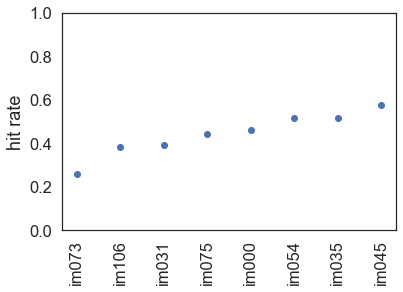

In [33]:
# plot hit rate by image with image names on the x-axis
fig, ax = plt.subplots()
plt.plot(hit_rates_sorted, 'o')
ax.set_xticks(np.arange(0,len(images_sorted),1));
ax.set_xticklabels(images_sorted, rotation=90);
ax.set_ylabel('hit rate');
ax.set_ylim(0,1);

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 1.5: Plot the response probability for all image transitions</b>

<p> The task cycles through 8 different images, resulting in 64 possible image transitions. Some image transitions might be easier for the mouse to detect than others. 

<p> 1) Use pandas <code>pivot_table</code> on the trials table to aggregate and average the <code>response_binary</code> values by <code>initial_image_name</code> and <code>change_image_name</code>. This will create a matrix of response probability for all image transitions. 
    
 __[Documentation for pandas.pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)__ 
 
</div>

In [34]:
# use pivot table to make a matrix of respones probability
response_matrix = pd.pivot_table(trials_df,  
                                 values='hit', 
                                 index='initial_image_name',
                                 columns='change_image_name')
response_matrix

change_image_name,im000,im031,im035,im045,im054,im073,im075,im106
initial_image_name,,,,,,,,
im000,0.000000,0.25,0.50,0.500000,0.500000,0.00,0.666667,0.000000
im031,0.500000,0.00,0.25,0.500000,0.500000,0.25,0.250000,0.250000
im035,0.500000,0.50,0.00,0.666667,0.750000,0.25,0.500000,0.500000
im045,0.666667,0.00,0.50,0.000000,0.500000,0.00,0.500000,0.500000
im054,0.666667,0.50,0.25,0.500000,0.000000,0.25,0.500000,0.500000
im073,0.250000,0.50,0.50,0.500000,0.250000,0.00,0.250000,0.666667
im075,0.250000,0.50,0.75,0.500000,0.500000,0.50,0.000000,0.333333
im106,0.500000,0.50,1.00,1.000000,0.666667,0.50,0.500000,0.000000


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p> 2) Plot the hit transition matrix as a heatmap. Try using seaborn's heatmap function.

 __[Documentation for seaborn.heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)__ 
    

<p> Did the mouse respond similarly for image changes compared to the same image repeated on catch trials? Are some image transitions more detectable than others? 

</div>

<AxesSubplot:xlabel='change_image_name', ylabel='initial_image_name'>

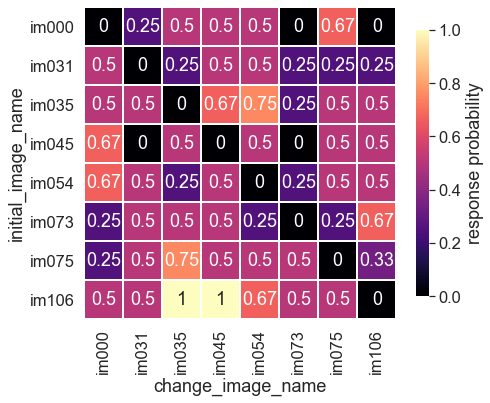

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(response_matrix, vmin=0, vmax=1, cmap='magma',
            square=True, annot=True, linewidths=0.01, cbar_kws={"shrink": 0.7, "label": 'response probability'}, ax=ax)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>Bonus: Plot response probability across image transitions for engaged trials only


<p> 1) Filter out trials where the mouse wasn't reliably performing the task using the value of the <code>reward_rate</code> column, with a threshold of 2 rewards per minute to distinguish engaged from disengaged periods, then plot the transition heatmap again. 

<p> Does varying engagement influence how we should analyze neural activity?

</div>

<AxesSubplot:xlabel='change_image_name', ylabel='initial_image_name'>

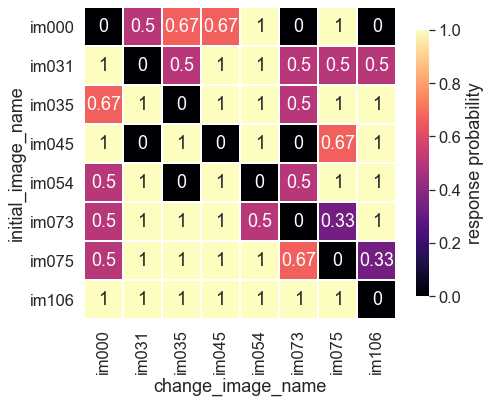

In [36]:
response_matrix = pd.pivot_table(trials_df[trials_df['reward_rate']>2],  
                                 values='hit', 
                                 index='initial_image_name',
                                 columns='change_image_name')

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(response_matrix, vmin=0, vmax=1, cmap='magma',
            square=True, annot=True, linewidths=0.01,
            cbar_kws={"shrink": 0.7, "label": 'response probability'}, ax=ax)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Single Cell Physiology Exercises</h2>
    
<p> These exercises explore neural activity aligned to trials or to all stimulus flashes. They make use of the 'trial_response_df' and 'flash_response_df' dataframes that have been pre-computed for you, after temporal alignment between ophys and stimulus data streams. 

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF;"
<p><b>Info about stimulus_presentations and stimulus_response dataframes</b>
    
<p> The <code>stimulus_response_df</code> contains metadata about each stimulus presentation in a given session. Additional steps are needed to add information about trials and animal behavior.
    
<p> The <code>stimulus_response_df</code> contains the response of each cell to each individual stimulus presentation during the session. 
    
<p> Both dataframes have a column called <code>trace</code> that contains a segment of each cell's fluorescence trace over a window of time. The duration of the window over which the <code>trace</code> was extracted can be specified in <code>get_stimulus_response</code> using <code>time_window</code> input variable. 
    
<p> If <code>compute_means</code> is True (default) in <code>get_stimulus_response</code>, you will have a column <code>mean_response</code> in the dataframe that contains each cell's response averaged over [0 time_window[1]] and <code>baseline_response</code> with pre stimulus activity mean.

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<p> Examine the <code>ophys.get_stimulus_response_df</code> to get a better understanding of the input variables. 

</div>

In [37]:
import mindscope_utilities.visual_behavior_ophys as ophys

In [38]:
ophys.get_stimulus_response_df?

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 2.1: Plot activity across stimulus repetitions using the stimulus response dataframe</b>

<p> 1) Assign ophys.get_stimulus_response_df(ophys_experiment, **kargs) to a variable called <code>stimulus_response_df</code>. 

<p> 2) Assign ophys_experiment.stimulus_presentations to a variable called <code>stimulus_presentations_df</code>. Use .copy() to make a copy of the dataframe in order to avoid accidently editing the original.

<p> 3) Merge <code>stimulus_presentations_df</code> onto <code>stimulus_response_df</code> using <code>stimulus_presentation_id</code> column as a key.  Pick a cell and get all change trials for that cell by filtering your new <code>stimulus_response_df</code> by both the <code>cell_specimen_id</code> column and the <code>is_change</code> column.

</div>

In [40]:
# aget stimulus response dataframe
experiment_id = selected_experiments.index.values[0]
ophys_experiment = cache.get_behavior_ophys_experiment(experiment_id)
stimulus_response_df = ophys.get_stimulus_response_df(ophys_experiment, 
                                                     time_window = [-1, 1.5],
                                                     data_type = 'dff',
                                                     event_type = 'changes')

C:\Users\iryna.yavorska\AppData\Roaming\Python\Python37\site-packages\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'behavior_monitoring', 'eye_tracking'}. Consider updating the sync file line labels.
  self._check_line_labels()
C:\Users\iryna.yavorska\AppData\Roaming\Python\Python37\site-packages\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'behavior_monitoring', 'eye_tracking'}. Consider updating the sync file line labels.
  self._check_line_labels()
100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:06<00:00,  5.48it/s]


In [41]:
stimulus_response_df

,stimulus_presentation_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response
0,28,1086490397,"[-0.10610490292310715, -0.10516360047096457, -...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.109166,-0.034598
1,28,1086490441,"[1.2530322074890137, 1.0610284349412382, 1.046...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",1.559505,1.307551
2,28,1086490480,"[-0.11520564556121826, -0.04237589172757581, -...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.085017,-0.087092
3,28,1086490510,"[0.294612854719162, 0.2976948152673882, 0.2008...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.948029,0.059393
4,28,1086490597,"[-0.06230897456407547, 0.0038545182202906012, ...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",-0.013318,0.003695
...,...,...,...,...,...,...
7057,4797,1086492221,"[0.07471834123134613, 0.026130776083167245, -0...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.020236,0.145017
7058,4797,1086492307,"[0.09740950912237167, 0.008039323368152534, -0...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.004243,0.006435
7059,4797,1086492406,"[-0.00740981288254261, -0.08064860144017788, -...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.063088,0.047943
7060,4797,1086493416,"[-0.033169958740472794, 0.017337145955371364, ...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.034264,-0.008924


In [42]:
# get stimulus_presentations_df
stimulus_presentations_df = ophys_experiment.stimulus_presentations.copy()
stimulus_presentations_df.head()

,duration,end_frame,image_index,image_name,image_set,index,is_change,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,,
0,0.25021,18000.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,0,False,False,17985,306.90981,307.16002
1,0.25018,18045.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,1,False,False,18030,307.66042,307.91060
2,0.25022,18090.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,2,False,False,18075,308.41101,308.66123
3,0.25012,18135.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3,False,False,18120,309.16175,309.41187
4,0.25024,18180.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4,False,False,18165,309.91222,310.16246


In [43]:
# merge stimulus response df with stimulus presentations to a new df
stimulus_response_df_merged = stimulus_response_df.join(stimulus_presentations_df, on='stimulus_presentation_id')

stimulus_response_df_merged.head()

,stimulus_presentation_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,duration,end_frame,image_index,image_name,image_set,index,is_change,omitted,start_frame,start_time,stop_time
0,28,1086490397,"[-0.10610490292310715, -0.10516360047096457, -...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.109166,-0.034598,0.25026,19260.0,3,im073,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,28,True,False,19245,327.92694,328.1772
1,28,1086490441,"[1.2530322074890137, 1.0610284349412382, 1.046...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",1.559505,1.307551,0.25026,19260.0,3,im073,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,28,True,False,19245,327.92694,328.1772
2,28,1086490480,"[-0.11520564556121826, -0.04237589172757581, -...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.085017,-0.087092,0.25026,19260.0,3,im073,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,28,True,False,19245,327.92694,328.1772
3,28,1086490510,"[0.294612854719162, 0.2976948152673882, 0.2008...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.948029,0.059393,0.25026,19260.0,3,im073,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,28,True,False,19245,327.92694,328.1772
4,28,1086490597,"[-0.06230897456407547, 0.0038545182202906012, ...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",-0.013318,0.003695,0.25026,19260.0,3,im073,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,28,True,False,19245,327.92694,328.1772


In [45]:
# get all flashes of preferred image for one cell
cell_specimen_ids = stimulus_response_df.cell_specimen_id.unique()
cell_specimen_id = cell_specimen_ids[0]

stimulus_response_df_sel = stimulus_response_df_merged[stimulus_response_df['cell_specimen_id']==cell_specimen_id]
stimulus_response_df_sel.head()

,stimulus_presentation_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,duration,end_frame,image_index,image_name,image_set,index,is_change,omitted,start_frame,start_time,stop_time
0,28,1086490397,"[-0.10610490292310715, -0.10516360047096457, -...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.109166,-0.034598,0.25026,19260.0,3,im073,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,28,True,False,19245,327.92694,328.17720
33,41,1086490397,"[0.6293858885765076, 0.42884157201498985, 0.21...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.334889,0.533715,0.25020,19845.0,5,im054,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,41,True,False,19830,337.68490,337.93510
66,51,1086490397,"[0.19601398706436157, 0.20126172932015782, 0.1...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.149670,0.193672,0.25018,20295.0,3,im073,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,51,True,False,20280,345.19102,345.44120
99,68,1086490397,"[0.37653717398643494, 0.2097462877626466, 0.15...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.228666,0.216413,0.25021,21060.0,7,im035,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,68,True,False,21045,357.95142,358.20163
132,85,1086490397,"[0.6566617488861084, 0.711896727783784, 0.5105...","[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.399999...",0.431779,0.830989,0.25020,21825.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,85,True,False,21810,370.71183,370.96203


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p> Get the values of the <code>trace</code> column from your selected dataframe. Loop through these values and plot the traces for all change trials. Set color='gray. 
    
Bonus: Plot with time relative to the stimulus onset, in seconds, on the x-axis. Hint: Use the <code>trace_timestamps</code> column to get time relative to stimulus onset for one stimulus presentation.
    
<p> 4) Take the mean of the <code>trace</code> values and plot the average response on the same figure as the individual trials, this time setting color='b'.

Does this cell have a reliable response to image changes? 

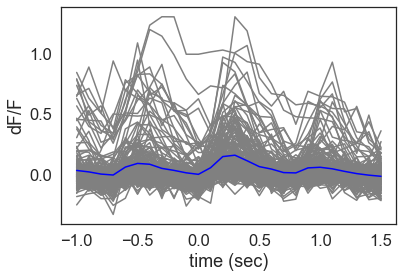

In [49]:
# plot for one cell
time_seconds = stimulus_response_df_sel.iloc[0]['trace_timestamps']

mean_trace = np.mean(stimulus_response_df_sel['trace'].values)

# loop through all trials and plot 
for trace in stimulus_response_df_sel['trace'].values: 
    plt.plot(time_seconds, trace, color='gray')
plt.xlabel('time (sec)')
plt.ylabel('dF/F')

# plot trace average
plt.plot(time_seconds, mean_trace, color='b');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">   

<p> 5) Create this plot for multiple cells. How do different cells respond?
    
Bonus: Plot multiple cells in one figure on different axes. Use <code>fig, ax = plt.subplots()</code> followed by <code>ax = ax.ravel()</code> to create iterable axes. 

 __[Documentation for matplotlib.pyplot.subplots()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html)__ 
    
 __[Why use fig, ax = plt.subplots() ? ](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python )__ 

</div>

In [51]:
len(cell_specimen_ids)

33

KeyError: 'is_change'

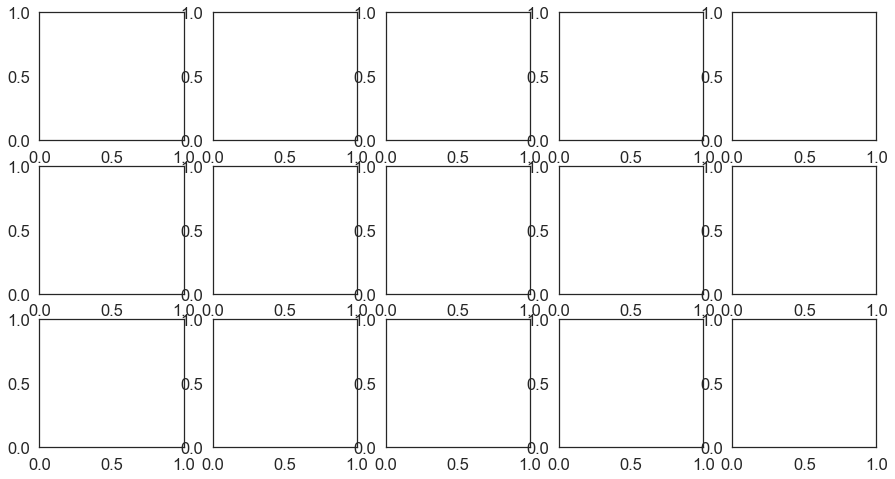

In [52]:
# plot for 15 cells
cell_specimen_ids = stimulus_response_df['cell_specimen_id'].unique()
fig, ax = plt.subplots(3,5, figsize=(15,8))
ax = ax.ravel()
if len(cell_specimen_ids) >=15:
    max_subplots = 15
else:
    max_subplots = len(cell_specimen_ids)
    
for i,cell_specimen_id in enumerate(cell_specimen_ids[:max_subplots]): 
    stimulus_response_df_sel = stimulus_response_df[(stimulus_response_df['cell_specimen_id']==cell_specimen_id) &
                                             (stimulus_response_df['is_change']==True)] # this line is redundant if you set event_type='changes'
    time_seconds = stimulus_response_df_sel.iloc[0]['trace_timestamps']
    mean_trace = np.mean(stimulus_response_df_sel['trace'].values)
    
    for trace in stimulus_response_df_sel['trace'].values: 
        ax[i].plot(time_seconds, trace, color='gray')
    ax[i].set_xlabel('time (sec)')
    ax[i].set_ylabel('dF/F')
    
    ax[i].plot(time_seconds, mean_trace, color='b')
fig.tight_layout()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 2.2: Correlate neural activity with running speed on a flash by flash basis</b>

<p> Trial to trial variability could arise from differences in animal behavior. One possibility is modulation by running speed. 

<p> 1) Pick a cell and select all flashes of its preferred stimulus. 
    
<p> 2) Create a scatterplot of running speed vs neural response magnitude using the <code>mean_response</code> and <code>mean_running_speed</code> columns of the <code>flash_response_df</code>. 

<p> The <code>mean_running_speed</code> is the average of the running_speed trace during the 250ms stimulus presentation for each image flash. 
    
</div>

In [ ]:
fr = session.flash_response_df.copy()

In [ ]:
# get preferred stimulus flashes for one cell
cell_specimen_ids = fr.cell_specimen_id.unique()
cell_specimen_id = cell_specimen_ids[4]

pref_stim_flashes = fr[(fr.cell_specimen_id==cell_specimen_id)&(fr.pref_stim==True)]
pref_stim_flashes.head()

In [ ]:
# plot scatter plot of mean response vs. running speed
fig, ax = plt.subplots()
ax = sns.scatterplot(data=pref_stim_flashes, x='mean_response', y='mean_running_speed', ax=ax)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p> 2) Compute the Pearson correlation between the flash-wise <code>mean_response</code> and <code>mean_running_speed</code> using <code>scipy.stats.pearsonr()</code>. Is there a correlation? 

</div>

In [ ]:
# get pearson correlation 
import scipy.stats as st
r, p = st.pearsonr(pref_stim_flashes['mean_response'].values, pref_stim_flashes['mean_running_speed'].values)
print('r = ', np.round(r,3))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<p> Bonus: Compute the running correlation for all cells in the session and plot a histogram of the values. 

</div>

In [ ]:
# get pearson correlation values for all cells
r_values = []
for cell_specimen_id in cell_specimen_ids:
    pref_stim_flashes = fr[(fr.cell_specimen_id==cell_specimen_id)&(fr.pref_stim==True)]
    r, p = st.pearsonr(pref_stim_flashes['mean_response'].values, pref_stim_flashes['mean_running_speed'].values)
    r_values.append(r)

In [ ]:
# plot distribution of pearson r values
plt.hist(r_values, bins=50);
plt.xlabel('r value');
plt.ylabel('count');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 2.3: Plot the trial averaged response across images for one cell using the trial response dataframe</b>
   
<p> 1) Assign the <code>trial_response_df</code> to a variable called <code>tr</code>. Dont forget to use <code>.copy()</code>
    
<p> 2) Which cell had the largest <code>mean_response</code>? What image was shown on that trial? Was it a go trial or a catch trial?  
    
</div>

In [ ]:
# get trial_response_df
tr = session.trial_response_df.copy()

In [ ]:
# get the trial with the largest value of mean_response
max_response_trial = tr[tr.mean_response==np.amax(tr.mean_response)]
# get info for that trial
cell_specimen_id = max_response_trial.cell_specimen_id.values[0]
change_image_name = max_response_trial.change_image_name.values[0]
go = max_response_trial.go.values[0]
catch = max_response_trial.catch.values[0]
# display info
print('cell_specimen_id: ' + str(cell_specimen_id))
print('change_image_name: ' + str(change_image_name))
print('go trial: ' + str(go))
print('catch trial: ' + str(catch))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p> 3) Plot the average <code>dff_trace</code> across trials for the cell, image name, and trial type identified in the step above. Plot the x-axis in seconds relative to the <code>change_time</code>. 
    
Bonus: Show the the time of the change flash (from 0 to .25 seconds after the change time) using ax.vspan(). 
</div>

In [ ]:
# plot the trial averaged trace for the conditions identified above
cell_data = tr[(tr.cell_specimen_id==cell_specimen_id)&(tr.change_image_name==change_image_name)&(tr.go==go)]
mean_trace = cell_data.dff_trace.mean()
timestamps = tr.iloc[0].dff_trace_timestamps  - tr.iloc[0].change_time
plt.plot(timestamps ,mean_trace, 'k')
plt.axvspan(0, 0.25 ,alpha=0.3,facecolor='blue')
plt.ylabel('mean dF/F');
plt.xlabel('time relative to change (sec)');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
 
<p> 4) Loop through the 8 images shown in this session and plot the average dF/F trace for each image for this cell.
    
</div>

In [ ]:
unique_images = tr.change_image_name.unique()
for change_image_name in unique_images:
    cell_data = tr[(tr.cell_specimen_id==cell_specimen_id)&(tr.change_image_name==change_image_name)&(tr.go==go)]
    mean_trace = cell_data.dff_trace.mean()
    plt.plot(timestamps, mean_trace)
plt.axvspan(0, 0.25, alpha=0.3, facecolor='blue')
plt.ylabel('mean dF/F')
plt.xlabel('time relative to change (sec)');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 2.4: Create a heatmap of all cells' trial averaged responses following an image change</b>

<p> The SDK has utilities functions to make some computations easier. Import the utilities using the code below, then run help() on the function <code>get_mean_df</code>. What are it's inputs and outputs? 
    
</div>

In [ ]:
# import SDK utilities 
import allensdk.brain_observatory.behavior.swdb.utilities as tools

help(tools.get_mean_df)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<p> 1) Filter the <code>trial_response_df</code> to get only go trials, then pass to the <code>get_mean_df</code> function. Set <code>conditions = ['cell_specimen_id', 'change_image_name']</code>. Assign the output of the function to <code>mean_df</code>. 

</div>

In [ ]:
mean_df = tools.get_mean_df(tr[tr.go], conditions=['cell_specimen_id', 'change_image_name'])
mean_df.head()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;"> 
<p> 2) Filter <code>mean_df</code> by <code>pref_stim</code> = True to limit the data to each cell's preferred image. 
    
<p> 3) Get the values in the <code>mean_trace</code> column and convert to an array using <code>np.stack()</code>.  This response array should be m x n where m is the number of unique cells in the session and n is the length of the <code>mean_trace</code> in frames.
    
</div>

In [ ]:
# create a matrix of the mean dF/F traces for the preferred image for all cells
mean_df = mean_df[mean_df.pref_stim==True]
response_matrix = mean_df.mean_trace.values
response_matrix = np.stack(response_matrix, axis=0)
response_matrix.shape

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;"> 
<p> 4) Plot a heatmap of all cells' mean trace for their preferred image. Set the vmax of the heatmap equal to the 95% percentile value of the response array using <code>np.percentile()</code>. Set vmin to 0. 
    
 __[Documentation for numpy.percentile()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html)__ 

<p> What structure do you see in this population? Bonus: Sort the cells to help see structure in the data.

<p> Extra bonus: Set xticklabels to display time in seconds relative to the change time. Hint: You can use the <code>ophys_frame_rate</code> to convert between ophys frames (the units of the <code>mean_trace</code>) and time in seconds. <code>ophys_frame_rate</code> can be obtained using the <code>metadata</code> attribute of the session object, or in the <code>analysis_files_metadata</code> attribute of the cache object. You may also need to know the window around the change time that was used in the creation of the <code>trial_response_df</code>. This can be found in <code>cache.analysis_files_metadata</code>, or you can recall the default value of [-4, 8].

</div>

In [ ]:
# sort cells in descending order
order = np.argsort(np.max(response_matrix,1))
response_matrix_sorted = response_matrix[order,:]

# create the plot
fig, ax = plt.subplots(figsize=(4,6))
ax.pcolormesh(response_matrix_sorted, cmap='magma', vmin=0, vmax=np.percentile(response_matrix, 95))
ax.set_ylabel('cells')

# fix up the axes
# get the window around the change_time used for trial_response_df creation
trial_response_range = cache.analysis_files_metadata['trial_response_df_params']['window_around_timepoint_seconds']
# ophys frame rate to convert between frames and seconds
ophys_frame_rate = cache.analysis_files_metadata['ophys_frame_rate'] 
# interval in seconds for x-axis labels
x_interval = 2 
# set xticks and xticklabels
ax.set_xticks(np.arange(0, response_matrix.shape[1], x_interval*ophys_frame_rate))
ax.set_xticklabels(np.arange(trial_response_range[0], trial_response_range[1], 2))
ax.set_xlabel('time relative to change (sec)');
fig.tight_layout()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 2.5: Compute a sparseness metric for one cell</b>

<p>lifetime sparseness is a metric for how selective and sparse a cell's activity is across conditions, bounded between 0 and 1. A high value of this metric indicates high selectivity - a differential response to one or a few stimulus conditions over others. A low value of this metric indicates a similar response across all conditions. 

<p> 1) Create an array containing the mean response across all flashes for each of the 8 images in the session for one cell. Hint: Use the <code>get_mean_df</code> function introduced in Exercise 2.4 to create a dataframe with the mean response by image for all cells, using the <code>flash_response_df</code>. 
    
<p> 2) Plot this array to visualize the cell's tuning for images. 
    
</div>

In [ ]:
fr = session.flash_response_df.copy()

In [ ]:
# get mean_df
mean_df = tools.get_mean_df(fr, conditions=['cell_specimen_id', 'image_name'])

In [ ]:
# get array of image responses for one cell
cell_data = mean_df[mean_df.cell_specimen_id==cell_specimen_id]
image_responses = cell_data.mean_response.values
images = cell_data.image_name.values
# plot it
plt.plot(image_responses, 'o')
plt.xticks(np.arange(0,len(images),1), labels=images, rotation=90);
plt.ylabel('mean dF/F')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<p> 2) Provide the image response array to the function below to compute the lifetime sparseness metric for your cell. How selective is this cell? 
    
</div>

In [ ]:
def compute_lifetime_sparseness(image_responses):
    # image responses should be an array of the trial averaged responses to each image
    # sparseness = 1-(sum of trial averaged responses to images / N)squared / (sum of (squared mean responses / n)) / (1-(1/N))
    # N = number of images
    # after Vinje & Gallant, 2000; Froudarakis et al., 2014
    N = float(len(image_responses))
    ls = ((1-(1/N) * ((np.power(image_responses.sum(axis=0),2)) / (np.power(image_responses,2).sum(axis=0)))) / (1-(1/N)))
    return ls

In [ ]:
# compute lifetime sparseness
ls = compute_lifetime_sparseness(image_responses)
print(ls)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 2.6: Identify image responsive cells and the mean lifetime sparseness across the population</b>
    
<p> We only want to quantify lifetime sparseness for cells with a significant image response, otherwise we would be including noise in our measurement. Before taking a population average, lets first identify responsive cells. 
    
<p> The <code>p_value</code> column of the <code>flash_response_df</code> is computed as a one-way ANOVA comparing the values of the dF/F trace in the 500ms after the flash with the activity during the spontaneous activity period. 

<p> Let's define responsive cells as having at least 10% of trials with a <code>p_value</code> < 0.005

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p> 1) Loop through all cells in the <code>flash_response_df</code>, evaluate the fraction of trials with <code>p_value</code> < 0.005 and make a list of the indicies of responsive cells. Assign the list to a variable called <code>responsive_cells</code>.
                                                                                                              <p> Alternatively, you can use the output of <code>get_mean_df()</code>, which includes a column called <code>fraction_signifiant_responses</code> where this value was computed for each cell for the given conditions. Provide  <code>conditions=['cell_specimen_id']</code> to get the <code>fraction_significant_responses</code> across all images for each cell.
                                                                                                           
<p>What fraction of cells in this experiment were responsive following a stimulus change? 

</div>

In [ ]:
# get responsive cells with get_mean_df
mean_df = tools.get_mean_df(session.flash_response_df, conditions=['cell_specimen_id'])
responsive_cells = mean_df[mean_df.fraction_significant_responses>0.01].cell_specimen_id.unique()
print('fraction responsive cells =',len(responsive_cells)/float(len(mean_df.cell_specimen_id.unique())))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>2) Loop through each cell in <code>responsive_cells</code>, compute lifetime sparseness as you did above, and add the value to a list. 

<p>3) Convert the list to an array and take the mean. How does the average selectivity across the population compare with your single cell measured in the previous Exercise? 

</div>

In [ ]:
# create mean_df for each cell and image pair
mean_fr = tools.get_mean_df(fr, conditions=['cell_specimen_id','image_name'])
# create pandas multi-index
mean_fr = mean_fr.set_index(['cell_specimen_id','image_name'])

# iterate through the responsive cells, and compute lifetime sparseness
all_ls= []
for cell in responsive_cells:
    image_responses =[]
    for i,image in  enumerate(images):
        cell_image = mean_fr.loc[(cell,image)]
        image_responses.append(cell_image.mean_response)        
    ls = compute_lifetime_sparseness(np.array(image_responses))
    all_ls.append(ls) 

In [ ]:
# turn into an array and take the mean
all_ls = np.array(all_ls)
np.mean(all_ls)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2> Across Session Physiology Exercises</h2>
  
<p>This section deals with comparing neural activity across different experiment sessions, both at the single cell and population level. It also teaches you some neat pandas tricks for reformatting data in useful ways.  
    
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 3.1: Follow along to learn some useful pandas tricks for multi session data comparison</b>

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
One interesting aspect of this dataset is that there are multiple behavior + ophys sessions from each animal. In some cases we might want to perform analyses that compare multiple sessions from the same container to know how behavior or neural responses change with each stage of the task.     

</div>

In [ ]:
experiments = cache.experiment_table
experiments.head(15)[['container_id','stage_name','ophys_experiment_id']]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
From there, we can select two experiment dataframes we wish to analyze from the same container.
</div>

In [ ]:
#an active, image_set A dataset
a_trials = cache.get_session(792815735).trials
#an active, image_set B dataset
b_trials = cache.get_session(795953296).trials

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We can compare many metrics between these two sessions, as an example, the hit rate between each session using code developed above
</div>

In [ ]:
fig, ax = plt.subplots(2,figsize=(10,4))

ax[0].plot(a_trials.change_time, a_trials.reward_rate)
ax[0].set_title('image set A session')
ax[0].set_ylabel ('reward rate')

ax[1].plot(b_trials.change_time, b_trials.reward_rate)
ax[1].set_xlabel ('time in session (sec)')
ax[1].set_title('image set B session')
ax[1].set_ylabel ('reward rate');
plt.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
For more in-depth analysis and to ease plotting, we can merge the two dataframes, passing keys to keep their labels
</div>

In [ ]:
a_b = pd.concat([a_trials,b_trials], keys=['a', 'b'])
a_b.head()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Note that looking at the tail lets you see the b trial dataframe that was just merged
</div>

In [ ]:
a_b.tail()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We can calculate simple metrics by grouping by the index. In a multi-index dataframe, these can be referenced by their level
</div>

In [ ]:
a_b.groupby(level=0).trial_length.mean()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We can also quickly plot metrics across the two sessions
</div>

In [ ]:
ax = sns.boxplot(data=a_b[a_b.go].reset_index(),x='level_0', y='response_latency')
ax.set_xlabel('image set')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
We can also get an idea if there are different numbers of trials, in this instance hit trials
</div>

In [ ]:
sns.countplot(data=a_b.reset_index()[['level_0','hit']],x='hit',hue='level_0')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p> <b>Exercise 3.2: Compare the activity of matched cells across sessions</b>
   
<p> In our experimental design, the same 2-photon field of view is imaged across multiple sessions. A cell may be observed in one or more sessions, dependending on whether or not it is active on different days. Cells that are identified across multiple days have the same 'cell_specimen_id' in all sessions in which they were observed. 
    
<p> To compare activity across multiple sessions, you can use another useful tool provided in the SDK utilities - the <code>create_multi_session_mean_df</code> function.      
    
<p> 1) Run help on  <code>create_multi_session_mean_df</code>. What are its inputs and outputs? 
    
<p> 2) Create a multi session df using the same 2 experiment sessions that were used above (<code>experiment_ids = [792815735, 795953296]</code>) and assign the output to variable called <code>multi_session_df</code>. Set <code>flashes = True</code> to merge across the <code>flash_response_df</code> for the 2 sessions. Note: If <code>flashes = False</code> (the default setting), the function will merge the <code>trial_response_df</code>. 
    
</div>

In [ ]:
help(tools.create_multi_session_mean_df)

In [ ]:
multi_session_df = tools.create_multi_session_mean_df(cache, [792815735,795953296], flashes=True, conditions=['cell_specimen_id','image_name'])

In [ ]:
multi_session_df.columns

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
By using the <code>groupby()</code> command you can quickly generate comparisons of the same cells across sessions. 
</div>

In [ ]:
# get the mean response across images for each experiment session, for each cell_specimen_id
multi_session_df.groupby(['cell_specimen_id','experiment_id'])['mean_response'].mean()

<iv style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p> Using the <code>unstack()</code> command you can regroup these values by cell
    
<p> How can you tell if a cell was identified in both sessions?
</div>

In [ ]:
# unstack the grouped dataframe to get each cell's mean_response for different experiments as columns
cell_exp_mean = multi_session_df.groupby(['cell_specimen_id','experiment_id'])['mean_response'].mean()
cell_exp_mean.unstack(level=-1).head()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
If the function you want to apply after the <code>groupby()</code> command operates on something other than a numeric value, such as the <code>mean_trace</code> array, you might need to use the <code>.apply(<function>)</code>command. 
    
</div>

In [ ]:
# get the mean trace across images for each experiment, for each cell
mean_trace = multi_session_df.groupby(['cell_specimen_id','experiment_id'])['mean_trace'].apply(np.mean)
mean_trace.head()

In [ ]:
# unstack to get experiments as columns
mean_trace = mean_trace.unstack(level=-1)
mean_trace.head()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;"> 
<p> 3) Use the <code>mean_trace</code> dataframe generated above to plot the dF/F trace for one cell across the 2 experiment sessions. Include the <code>experiment_id</code> that each trace came from in the figure legend. Make sure it is a cell that has a <code>mean_trace</code> in both sessions. 
    
<p> How does the response differ across days? 
    
</div>

In [ ]:
mean_trace.head()

In [ ]:
cell_data = mean_trace.iloc[0]
# hacky way to get timestamps for now
flash_timestamps = session.flash_response_df.iloc[0]['dff_trace_timestamps'] - session.flash_response_df.iloc[0]['start_time']
for experiment_id in cell_data.keys():
    plt.plot(flash_timestamps, cell_data[experiment_id], label=str(experiment_id))
plt.legend(loc='upper left');
plt.xlabel('time relative to stimulus onset (sec)');
plt.ylabel('dF/F');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p> <b>Exercise 3.3: Merge all the experiments from a single container and plot the mean response for different image sets</b>   
    
<p> 1) Get all experiment_ids for a single container_id. 

<p> 2) Merge the trial_response_dfs across sessions using <code>create_multi_session_mean_df</code> and assign the output to 'container_trial_mean_df'. 
</div>

In [ ]:
# get experiment_ids for one container
experiment_ids = experiments[experiments.container_id == 803517529].ophys_experiment_id.values

In [ ]:
# create multi_session dataframe with experiments from this container
container_trial_mean_df = tools.create_multi_session_mean_df(cache, experiment_ids)

In [ ]:
# group by experiment_id and stage_name to get the mean response across different session types
container_trial_mean_df.groupby(['experiment_id','stage_name']).mean_response.mean()

In [ ]:
# group by experiment_id and image_set to get the mean response across different image sets
container_trial_mean_df.groupby(['experiment_id','image_set']).mean_response.mean()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">    
<p> 3) Plot the mean response for image set A vs. image set B for each cell as a scatter plot. Hint: use <code>groupby()</code> and <code>unstack()</code> as demonstrated above to make it more efficient. 
</div>

In [ ]:
# ineffient but intuitive way
fig, ax = plt.subplots()
for cell_specimen_id in container_trial_mean_df.cell_specimen_id.unique():
    df = container_trial_mean_df[container_trial_mean_df.cell_specimen_id==cell_specimen_id].copy()
    a_response = df[df.image_set=='A'].mean_response.mean()
    b_response = df[df.image_set=='B'].mean_response.mean()
    ax.plot(a_response, b_response, 'ok')
ax.plot([0,0.4],[0,0.4],'k--')
ax.set_xlabel('mean dF/F image set A');
ax.set_ylabel('mean dF/F image set B');

In [ ]:
# efficient pandas magic way
# plot the mean response of each cell to image set A vs image set B
cell_image = container_trial_mean_df.groupby(['cell_specimen_id','image_set']).mean_response.mean().unstack(level=1)
plt.plot(cell_image.values[:,0],cell_image.values[:,1],'ko')
plt.plot([0,0.25],[0,0.25],'k--');
plt.xlabel('mean dF/F image set A');
plt.ylabel('mean dF/F image set B');

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">    
<p> 4) Plot the population average trace across cells for image set A vs. image set B using the values of the <code>mean_trace</code> column. Indicate the image set for each trace in a figure legend. 
<p> Bonus: plot the x-axis in seconds. 
<p> Which image set evokes stronger activity across the population? 
</div>

In [ ]:
# solution method 1
fig, ax = plt.subplots()
df = container_trial_mean_df.copy()
# get population average trace for both image sets
a_response = df[df.image_set=='A'].mean_trace.mean()
b_response = df[df.image_set=='B'].mean_trace.mean()
# get timestamps to plot
tr = session.trial_response_df.copy()
timestamps = tr.iloc[0].dff_trace_timestamps - tr.iloc[0].change_time
# plot both traces
ax.plot(timestamps, a_response, color='r', label='A')
ax.plot(timestamps, b_response, color='b', label='B')
plt.xlabel('time relative to change (sec)')
plt.ylabel('mean dF/F')
plt.legend();

In [ ]:
# solution method 2
# plot the average trace for all cells by image_set
image_set_trace= container_trial_mean_df.groupby('image_set').mean_trace.apply(np.mean)
tr = session.trial_response_df.copy()
timestamps = tr.iloc[0].dff_trace_timestamps - tr.iloc[0].change_time
plt.plot(timestamps, image_set_trace.loc['A'],'r',label='A')
plt.plot(timestamps, image_set_trace.loc['B'],'b',label='B')
plt.xlabel('time relative to change (sec)')
plt.ylabel('mean dF/F')
plt.legend();

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><b>Exercise 3.4: Plot the trial averaged response for passive vs. active sessions from one container</b>
   
<p> Use the pandas skills learned above to plot the mean response on passive vs. active sessions. 
    
<p> 1) Plot the cell by cell mean response for passive vs. active as a scatterplot. Use the <code>passive</code> column of the <code>container_trial_mean_df</code> dataframe to differentiate passive vs. active.  
</div>

In [ ]:
# mean across the entire session
container_trial_mean_df.groupby('passive').mean_response.mean()

In [ ]:
# cell by cell plot
cell_passive = container_trial_mean_df.groupby(['cell_specimen_id','passive']).mean_response.mean().unstack(level=1)
plt.plot(cell_passive.values[:,0],cell_passive.values[:,1],'ko')
plt.plot([0,0.2],[0,0.2],'k--');
plt.xlabel('mean dF/F active sessions');
plt.ylabel('mean dF/F passive sessions');

In [ ]:
# plot the average trace across all cells by active/passive
passive = container_trial_mean_df.groupby('passive').mean_trace.apply(np.mean)
timestamps = tr.iloc[0].dff_trace_timestamps - tr.iloc[0].change_time
plt.plot(timestamps,passive.loc[False],'r',label='Active')
plt.plot(timestamps,passive.loc[True],'b',label='Passive')
plt.xlabel('time relative to change (sec)')
plt.ylabel('mean dF/F')
plt.legend()